In [61]:
from __future__ import division
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
 
import platform
import config
import socket
import time
import math as m

_sock = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
_sock2 = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
_sock3 = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)

num_led = 120
 

data = []
 
r = 0
b=0
g=0


#def f(r):
#    return r





     # Define the wheel function to interpolate between different hues.
def wheel(pos):
    if pos < 85:
        return (pos * 3, 255 - pos * 3, 0)
    elif pos < 170:
        pos -= 85
        return (255 - pos * 3, 0, pos * 3)
    else:
        pos -= 170
        return (0, pos * 3, 255 - pos * 3)

# Define rainbow cycle function to do a cycle of all hues.
#while True:



#@interact(x=widgets.IntSlider(min=0,max=255,step=1,value=0), 
 #         y=widgets.IntSlider(min=0,max=255,step=1,value=0), 
 #         z=widgets.IntSlider(min=0,max=255,step=1,value=0))
def control_leds(r, g, b, leds,led_pos, mode):
        
    
    #for j in range(256): # one cycle of all 256 colors in the wheel
        data = []
        for lower in range(leds[0]):
            data1 = (0, 0, 0)
            #data1 = wheel(((i * 256 // num_led) + j) % 256) 
            data.append(lower)
            data.append(data1[0])
            data.append(data1[1])
            data.append(data1[2])
        for i in range(leds[0], leds[1]):
            # tricky math! we use each pixel as a fraction of the full 96-color wheel
            # (thats the i / strip.numPixels() part)
            # Then add in j which makes the colors go around per pixel
            # the % 96 is to make the wheel cycle around
            if mode == "color":
                data1 = (b, g, r)
            elif mode == "kitt":
                i *= 4
                if i == leds[0]:
                    data1 = (b, g, r)
                    data.append(i)
                    data.append(data1[0])
                    data.append(data1[1])
                    data.append(data1[2])
                else:
                    data1 = (0, 0, 0)
                    data.append(i)
                    data.append(data1[0])
                    data.append(data1[1])
                    data.append(data1[2])
                #for i in range(0, num_led*4, 4):
                try:
                    if i == (leds[1]-leds[0])-8:
                        prev = data[i]
                        data[i] = data[leds[0]]
                        data[i-4] = prev
                    elif i == leds[0]:
                        prev = data[i]
                        data[i] = data[i+4]
                        data[((leds[1]-leds[0])*4-3)] = prev
                    else:
                        prev = data[i]
                        data[i] = data[i+4]
                        data[i-4] = prev  
                except:
                    IndexError
                    print(i)
                    print(data)
                
        
        
            elif mode == "rainbow":
                for c in range(256): # one cycle of all 256 colors in the wheel
                    data1 = wheel(((i * 256 // (leds[1]-leds[0])) + c) % 256)
            else:
                data1 = (0, 0, 0)
            data.append(i)
            data.append(data1[0])
            data.append(data1[1])
            data.append(data1[2])
        for upper in range(leds[1], num_led):
            data1 = (0, 0, 0)
            #data1 = wheel(((i * 256 // num_led) + j) % 256) 
            data.append(upper)
            data.append(data1[0])
            data.append(data1[1])
            data.append(data1[2])
        #print(data)
        data = bytes(data)
        """
        _sock.sendto(data, (config.UDP_IP, config.UDP_PORT))
        _sock2.sendto(data, (config.UDP2_IP, config.UDP_PORT))
        _sock3.sendto(data, (config.UDP3_IP, config.UDP_PORT))
        """
        #time.sleep(1)
        data = []
        

r_slider = widgets.IntRangeSlider(
            value=[0, num_led],
            min=0,
            max=num_led,
            step=1,
            description='LEDs')

r_btns = widgets.RadioButtons(
            options=['color', 'rainbow', "kitt", 'off'],
            description='Mode')

pos_slider = widgets.IntSlider(value=0, 
                               min=0, 
                               max=num_led, 
                               step=1, 
                               description="StartPos")

f = interactive(control_leds, r=(0,255,1), g=(0,255,1), b=(0,255,1), leds=r_slider, led_pos=pos_slider, mode=r_btns)

display(f)

interactive(children=(IntSlider(value=127, description='r', max=255), IntSlider(value=127, description='g', ma…

In [42]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import hsv_to_rgb
from itertools import cycle

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

num_leds = 120
step = 1.0 / num_leds
# h,s,v tuples, value and saturation should be full, cycle through colors with hue
v = s = 1.0

h_vals = np.linspace(0.0, 1.0, num_leds)  # h werte für alle farben

clrs = [hsv_to_rgb((h, s, v)) for h in h_vals]  # create 100 colors 
x_data = np.linspace(0, np.pi * 2, num_leds)
y_data = np.array([np.sin(x) for x in x_data])  
#plt.scatter(x_data, y_data, c=clrs, s=50, marker="o")
#plt.show()

def make_rgb_color(h,s,v):
    
    return tuple(int(np.round(c * 255)) for c in hsv_to_rgb((h, s, v)))

def make_frgb_color(h, s, v):
    clr = list(hsv_to_rgb((h,s,v)))
    clr.append(1.0)
    
    return tuple(clr)

def hue_to_rgb_cycler(num_values, h_offset=0, s=1.0, v=1.0):
    hue_cycler = cycle(np.arange(0.0, 1.0, 1.0 / num_values))
    
    for i in range(h_offset):
        next(hue_cycler)
    
    for h in hue_cycler:
        #yield make_rgb_color(h, s, v)
        yield make_frgb_color(h, s, v)

x_data = np.linspace(0, np.pi * 2, num_leds)
y_data = np.array([np.sin(x) for x in x_data])  


def cycle_colors(color_pos):
    
    # h,s,v tuples, value and saturation should be full, cycle through colors with hue
    v = s = 1.0
    num_leds = 120
    cycler = hue_to_rgb_cycler(num_values=120, h_offset=color_pos)
    clrs = [next(cycler) for i in range(num_leds)]
    #x_data = np.linspace(0, np.pi * 2, num_leds)
    #y_data = np.array([np.sin(x) for x in x_data])  
    #plt.scatter(x_data, y_data, c=clrs, s=50, marker="o")
    #plt.show()
    #for marker_clr, clr_old in zip(clrs)
    ax = plt.scatter(x_data, y_data, s=50, marker="o")
    ax.set_facecolors(clrs)
    #plt.show()


f = interactive(cycle_colors, color_pos=widgets.IntSlider(
            value=0,
            min=0,
            max=num_leds,
            step=1,
            #description='LEDs',     
            ))
display(f)

interactive(children=(IntSlider(value=0, description='color_pos', max=120), Output()), _dom_classes=('widget-i…

In [2]:
from __future__ import division
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import platform
#import config
import socket
import time
from itertools import cycle
    
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import hsv_to_rgb
    


def make_rgb_color(h,s,v):
    
    return tuple(int(np.round(c * 255)) for c in reversed(hsv_to_rgb((h, s, v))))

def make_frgb_color(h, s, v):
    
    return tuple(hsv_to_rgb((h,s,v))[:3])

def hue_to_rgb_cycler(num_values, h_offset=0, s=1.0, v=1.0):
    hue_cycler = cycle(np.arange(0.0, 1.0, 1.0 / num_values))
    
    for i in range(h_offset):
        next(hue_cycler)
    
    for h in hue_cycler:
        yield make_rgb_color(h, s, v)
        
def hue_to_frgb_cycler(num_values, h_offset=0, s=1.0, v=1.0):
    hue_cycler = cycle(np.arange(0.0, 1.0, 1.0 / num_values))
    
    for i in range(h_offset):
        next(hue_cycler)
    
    for h in hue_cycler:
        yield make_frgb_color(h, s, v)

In [3]:
%matplotlib inline
#
#_sock = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
#_sock2 = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
#_sock3 = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)

num_led = 120
r = b = g = 0      

def control_leds(r, g, b, leds,led_pos, mode, output):
        
        # initiiere die led daten für (led_id, r, g, b) für jede led
        led_array = np.zeros(num_led * 4, dtype=int)
        plt_clrs = np.zeros((num_led, 3))  # für matplotlib: r, g, b, a
        
        
        color_cycler = hue_to_rgb_cycler(num_led, h_offset=led_pos)
        plt_color_cycler = hue_to_frgb_cycler(num_led, h_offset=led_pos)
        
        # wir definieren funktionen die uns für einen led index eine farbe geben
        if mode == 'color':
            # egal welcher index, es wird immer die r, g, b farbe ausgegeben
            color_fun = lambda idx: (b, g, r)
            plt_clr_fun = lambda idx: (r/255, g/255, b/255)
            
        elif mode == "kitt":
            # wenn der index innerhalb der range liegt, wird die farbe ausgegeben, sonst schwarz
            
            led_range = range(leds[0], leds[1] +1) # indices für aktive für kitt
            
            color_fun = lambda idx: (b, g, r) if idx in led_range else (0, 0, 0)
            plt_clr_fun = lambda idx: (r/255, g/255, b/255) if idx in led_range else (0.0, 0.0, 0.0)
            
        elif mode == "rainbow":
            # es wird immer die nächste farbe vom cycler ausgegeben
            color_fun = lambda idx: next(color_cycler)
            plt_clr_fun = lambda idx: next(plt_color_cycler)
            
        elif mode == 'off':
            # es wird immer schwarz ausgegeben
            color_fun = lambda idx: (0, 0, 0)
            plt_clr_fun = lambda idx: (0.0, 0.0, 0.0)
        else:
            # wir haben keine farbe, die funktion hört auf
            return
        
        
        # jede 4. led ist eine id position also nehmen wir step 4 und starten unsere enumeration bei 1
        for led_id, array_idx in enumerate(range(0, num_led*4, 4), start=1):
            led_array[array_idx] = led_id
            low, up = array_idx+1, array_idx+4     # indices für r, g, b 
            led_array[low:up] = color_fun(led_id) # wir setzen die drei werte ein, die uns die funktion oben geben
            plt_clrs[led_id-1,:] = plt_clr_fun(led_id) # für matplotlib
            
        
        if output == 'graph':
            x_data = np.linspace(0, 2*np.pi, num_led)
            y_data = np.sin(x_data)
            plt.scatter(x_data, y_data, c=plt_clrs, edgecolor="face", s=50) # matplotlib output
            plt.show()
            
        elif output == 'controller':
            data = bytes(led_array)
            print(data[:10])
            
            

r_slider = widgets.IntRangeSlider(
            value=[0, num_led],
            min=0,
            max=num_led,
            step=1,
            description='LEDs',
            continuous_update=False)

r_btns = widgets.RadioButtons(
            options=['color', 'rainbow', "kitt", 'off'],
            description='Mode')

output_btns = widgets.RadioButtons(options=["controller", "graph"],
                                  description="Output")

pos_slider = widgets.IntSlider(value=0, 
                               min=0, 
                               max=num_led, 
                               step=1, 
                               description="StartPos",
                              continuous_update=False)

f = interactive(control_leds, r=(0,255,1), g=(0,255,1), b=(0,255,1), leds=r_slider, 
                led_pos=pos_slider, mode=r_btns, output=output_btns)

display(f)

interactive(children=(IntSlider(value=127, description='r', max=255), IntSlider(value=127, description='g', ma…

update


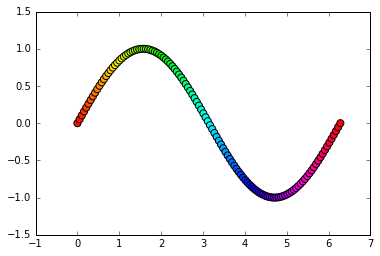

In [54]:
# Animated
from matplotlib.animation import FuncAnimation

cycler = hue_to_rgb_cycler(num_values=120, h_offset=color_pos)
clrs = [next(cycler) for i in range(num_leds)]
x_data = np.linspace(0, np.pi * 2, num_leds)
y_data = np.array([np.sin(x) for x in x_data]) 

fig, ax = plt.subplots()
ln = ax.scatter(x_data, y_data, c=clrs, s=50, marker="o", animated=True)


def update(frame):
    next(cycler)
    print("update")
    clrs = [next(cycler) for i in range(num_leds)]
    ln.set_facecolor(clrs)
    return ln,


ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128), blit=True)
fig.show()